In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
df0 = pd.read_excel (r'input/370.xlsx',header=[3])
df0.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df0.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
df0 = df0[df0.Customer != "TRANSFERS TO #372 J'VILLE"]
df0 = df0[df0.Customer != "TRANSFERS TO #374 SEYMOUR"]
df0 = df0[df0.Customer != "TRANSFERS TO #373 E-TOWN"]
df0 = df0[df0.Customer != "TRANSFERS TO #375 S'VILLE"]
df0 = df0[df0.Customer != "*** STORE TRANSFERS ***"]
df0 = df0[df0.Customer != "Beginning Balance"]
df0 = df0[df0.Customer != 'Net Activity']
df0 = df0[df0.Customer != 'Ending Balance']
df0 = df0[df0.Customer != 'VOID']
df0 = df0[df0.Customer != "TRANSFERS TO #376 L'VILLE"]
df0 = df0.dropna(how="all")
Gross = df0.Qty * df0.Price
df0['Gross'] = Gross.where(df0.Price == 'Qty', other=Gross)

Net = df0.Qty * df0.Cost 
df0['Net'] = Net.where(df0.Cost == 'Qty', other=Net)

Net = df0.Gross - df0.Net 
df0['Net'] = Net.where(df0.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross270 = {
    'Gross' : df0['Gross'].sum(),
    'Net' : df0['Net'].sum()
}

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
by_cust =(df0['Customer']).value_counts().sort_index()
df0_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df0_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df0_customer = df0_customer.reset_index(drop=True)
# df0_customer
df0_customer.to_csv(r'output/370_customers.csv', index=False)

In [4]:
df0['Date'] = pd.to_datetime(df0['Date'])
df0['Date'] = df0['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df0 = df0.groupby(df0['Date']).aggregate(agg_functions)

# print(df0)

# df_new.to_csv(r'df5.csv', index=False)

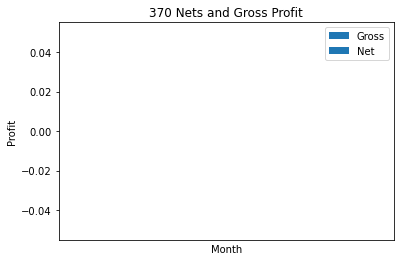

In [5]:
# x-coordinates of left sides of bars 
left = df0['Date']
  
# heights of bars
Gross = df0['Gross']
Net = df0['Net']
  
# labels for bars
tick_label = df0['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('370 Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/370_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 372 Import and Clean 

In [6]:
df1 = pd.read_excel (r'input/372.xlsx',header=[3])
df1.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df1.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
df1 = df1[df1.Customer != "TRANSFERS TO #372 J'VILLE"]
df1 = df1[df1.Customer != "TRANSFERS TO #374 SEYMOUR"]
df1 = df1[df1.Customer != "TRANSFERS TO #373 E-TOWN"]
df1 = df1[df1.Customer != "TRANSFERS TO #375 S'VILLE"]
df1 = df1[df1.Customer != "*** STORE TRANSFERS ***"]
df1 = df1[df1.Customer != "Beginning Balance"]
df1 = df1[df1.Customer != 'Net Activity']
df1 = df1[df1.Customer != 'Ending Balance']
df1 = df1[df1.Customer != 'VOID']
df1 = df1[df1.Customer != "TRANSFERS TO #376 L'VILLE"]
df1 = df1.dropna(how="all")

Gross = df1.Qty * df1.Price
df1['Gross'] = Gross.where(df1.Price == 'Qty', other=Gross)

Net = df1.Qty * df1.Cost 
df1['Net'] = Net.where(df1.Cost == 'Qty', other=Net)

Net = df1.Gross - df1.Net 
df1['Net'] = Net.where(df1.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross272 = {
    'Gross' : df1['Gross'].sum(),
    'Net' : df1['Net'].sum()
}

In [7]:
by_cust =(df1['Customer']).value_counts().sort_index()
df1_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df1_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df1_customer = df1_customer.reset_index(drop=True)
# df1_customer
df1_customer.to_csv(r'output/372_customers.csv', index=False)

In [8]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df1 = df1.groupby(df1['Date']).aggregate(agg_functions)

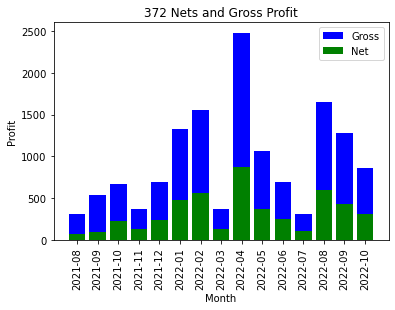

In [9]:
# x-coordinates of left sides of bars 
left = df1['Date']
  
# heights of bars
Gross = df1['Gross']
Net = df1['Net']
  
# labels for bars
tick_label = df1['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('372 Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/372_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 373 Import and Clean 

In [10]:
df2 = pd.read_excel (r'input/373.xlsx',header=[3])
df2.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df2.rename(columns={'Customer/Vendor Name' : 'Customer', "Transaction Date" : 'Date', 'Non-Inventory Quantity' : 'Qty','Transaction Date' : 'Date'}, inplace=True)
df2 = df2[df2.Customer != "TRANSFERS TO #372 J'VILLE"]
df2 = df2[df2.Customer != "TRANSFERS TO #374 SEYMOUR"]
df2 = df2[df2.Customer != "TRANSFERS TO #373 E-TOWN"]
df2 = df2[df2.Customer != "TRANSFERS TO #375 S'VILLE"]
df2 = df2[df2.Customer != "*** STORE TRANSFERS ***"]
df2 = df2[df2.Customer != "Beginning Balance"]
df2 = df2[df2.Customer != 'Net Activity']
df2 = df2[df2.Customer != 'Ending Balance']
df2 = df2[df2.Customer != 'VOID']
df2 = df2[df2.Customer != "TRANSFERS TO #376 L'VILLE"]
df2 = df2.dropna(how="all")

Gross = df2.Qty * df2.Price
df2['Gross'] = Gross.where(df2.Price == 'Qty', other=Gross)

Net = df2.Qty * df2.Cost 
df2['Net'] = Net.where(df2.Cost == 'Qty', other=Net)

Net = df2.Gross - df2.Net 
df2['Net'] = Net.where(df2.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross273 = {
    'Gross' : df2['Gross'].sum(),
    'Net' : df2['Net'].sum()
}

In [11]:
by_cust =(df2['Customer']).value_counts().sort_index()
df2_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df2_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df2_customer = df2_customer.reset_index(drop=True)
# df2_customer
df2_customer.to_csv(r'output/373_customers.csv', index=False)

In [12]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = df2['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df2 = df2.groupby(df2['Date']).aggregate(agg_functions)

# print(df2)


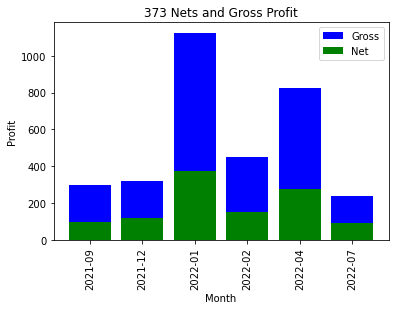

In [13]:
# x-coordinates of left sides of bars 
left = df2['Date']
  
# heights of bars
Gross = df2['Gross']
Net = df2['Net']
  
# labels for bars
tick_label = df2['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('373 Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/373_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 374 Import and Clean 

In [14]:
df3 = pd.read_excel (r'input/374.xlsx',header=[3])
df3.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df3.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
df3 = df3[df3.Customer != "TRANSFERS TO #372 J'VILLE"]
df3 = df3[df3.Customer != "TRANSFERS TO #374 SEYMOUR"]
df3 = df3[df3.Customer != "TRANSFERS TO #373 E-TOWN"]
df3 = df3[df3.Customer != "TRANSFERS TO #375 S'VILLE"]
df3 = df3[df3.Customer != "*** STORE TRANSFERS ***"]
df3 = df3[df3.Customer != "Beginning Balance"]
df3 = df3[df3.Customer != 'Net Activity']
df3 = df3[df3.Customer != 'Ending Balance']
df3 = df3[df3.Customer != 'VOID']
df3 = df3[df3.Customer != "TRANSFERS TO #376 L'VILLE"]
df3 = df3.dropna(how="all")

Gross = df3.Qty * df3.Price
df3['Gross'] = Gross.where(df3.Price == 'Qty', other=Gross)

Net = df3.Qty * df3.Cost 
df3['Net'] = Net.where(df3.Cost == 'Qty', other=Net)

Net = df3.Gross - df3.Net 
df3['Net'] = Net.where(df3.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross274 = {
    'Gross' : df3['Gross'].sum(),
    'Net' : df3['Net'].sum()
}

In [15]:
by_cust =(df3['Customer']).value_counts().sort_index()
df3_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df3_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df3_customer = df3_customer.reset_index(drop=True)
# df3_customer
df3_customer.to_csv(r'output/374_customers.csv', index=False)

In [16]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Date'] = df3['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df3 = df3.groupby(df3['Date']).aggregate(agg_functions)

# print(df3)

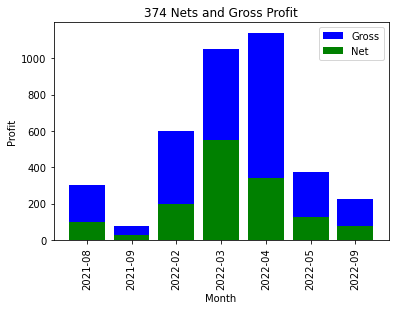

In [17]:
# x-coordinates of left sides of bars 
left = df3['Date']
  
# heights of bars
Gross = df3['Gross']
Net = df3['Net']
  
# labels for bars
tick_label = df3['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('374 Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/374_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 375 Import and Clean 

In [18]:
df4 = pd.read_excel (r'input/375.xlsx',header=[3])
df4.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df4.rename(columns={'Customer/Vendor Name' : 'Customer', 'Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
df4 = df4[df4.Customer != "TRANSFERS TO #372 J'VILLE"]
df4 = df4[df4.Customer != "TRANSFERS TO #374 SEYMOUR"]
df4 = df4[df4.Customer != "TRANSFERS TO #373 E-TOWN"]
df4 = df4[df4.Customer != "TRANSFERS TO #375 S'VILLE"]
df4 = df4[df4.Customer != "*** STORE TRANSFERS ***"]
df4 = df4[df4.Customer != "Beginning Balance"]
df4 = df4[df4.Customer != 'Net Activity']
df4 = df4[df4.Customer != 'Ending Balance']
df4 = df4[df4.Customer != 'VOID']
df4 = df4[df4.Customer != "TRANSFERS TO #376 L'VILLE"]
df4 = df4.dropna(how="all")

Gross = df4.Qty * df4.Price
df4['Gross'] = Gross.where(df4.Price == 'Qty', other=Gross)

Net = df4.Qty * df4.Cost 
df4['Net'] = Net.where(df4.Cost == 'Qty', other=Net)

Net = df4.Gross - df4.Net 
df4['Net'] = Net.where(df4.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross275 = {
    'Gross' : df4['Gross'].sum(),
    'Net' : df4['Net'].sum()
}

In [19]:
by_cust =(df4['Customer']).value_counts().sort_index()
df4_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df4_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df4_customer = df4_customer.reset_index(drop=True)
df4_customer
df4_customer.to_csv(r'output/375_customers.csv', index=False)

In [20]:
df4['Date'] = pd.to_datetime(df4['Date'])
df4['Date'] = df4['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df4 = df4.groupby(df4['Date']).aggregate(agg_functions)

# print(df4)

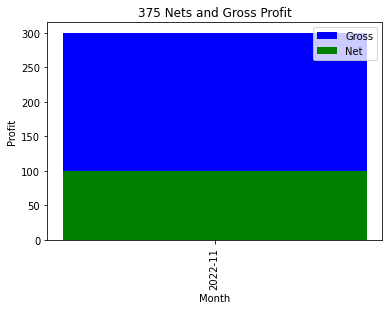

In [21]:
# x-coordinates of left sides of bars 
left = df4['Date']
  
# heights of bars
Gross = df4['Gross']
Net = df4['Net']
  
# labels for bars
tick_label = df4['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('375 Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/375_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

In [22]:
# df5 = pd.read_excel (r'376.xlsx',header=[3])
df5 = pd.read_excel (r'input/376.xlsx',header=[3])
# ../data_folder/data.csv

df5.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)

df5.rename(columns={'Customer/Vendor Name' : 'Customer', 'Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)

df5 = df5[df5.Customer != "TRANSFERS TO #372 J'VILLE"]
df5 = df5[df5.Customer != "TRANSFERS TO #374 SEYMOUR"]
df5 = df5[df5.Customer != "TRANSFERS TO #373 E-TOWN"]
df5 = df5[df5.Customer != "TRANSFERS TO #375 S'VILLE"]
df5 = df5[df5.Customer != "*** STORE TRANSFERS ***"]
df5 = df5[df5.Customer != "Beginning Balance"]
df5 = df5[df5.Customer != 'Net Activity']
df5 = df5[df5.Customer != 'Ending Balance']
df5 = df5[df5.Customer != 'VOID']
df5 = df5[df5.Customer != "TRANSFERS TO #376 L'VILLE"]
df5 = df5.dropna(how="all")

Gross = df5.Qty * df5.Price
df5['Gross'] = Gross.where(df5.Price == 'Qty', other=Gross)

Net = df5.Qty * df5.Cost 
df5['Net'] = Net.where(df5.Cost == 'Qty', other=Net)

Net = df5.Gross - df5.Net 
df5['Net'] = Net.where(df5.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross276 = {
    'Gross' : df5['Gross'].sum(),
    'Net' : df5['Net'].sum()
}

In [23]:
by_cust =(df5['Customer']).value_counts().sort_index()
df5_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df5_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df5_customer = df5_customer.reset_index(drop=True)
df5_customer
df5_customer.to_csv(r'output/376_customers.csv', index=False)

In [24]:
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Date'] = df5['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df5 = df5.groupby(df5['Date']).aggregate(agg_functions)

# print(df5)

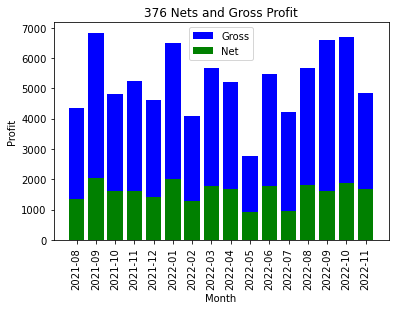

In [25]:
# x-coordinates of left sides of bars 
left = df5['Date']
  
# heights of bars
Gross = df5['Gross']
Net = df5['Net']
  
# labels for bars
tick_label = df5['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('376 Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/376_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

In [26]:
frames = [df0, df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
# df99.drop(columns=['Date'], inplace=True)
# df99.head(30)

# print(df99['Net'].sum())
# print(df99['Gross'].sum())

In [27]:
frames = [df0, df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
df99.head()

# print(df99['Net'].sum())
# print(df99['Gross'].sum())


Net_Gross = {
    '370_Gross' : df0['Gross'].sum(),
    '370_net' : df0['Net'].sum(),
    '372_Gross' : df1['Gross'].sum(),
    '372_net' : df1['Net'].sum(),
    '373_Gross' : df2['Gross'].sum(),
    '373_net' : df2['Net'].sum(),
    '374_Gross' : df3['Gross'].sum(),
    '374_net' : df3['Net'].sum(),
    '375_Gross' : df4['Gross'].sum(),
    '375_net' : df4['Net'].sum(),
    '376_Gross' : df5['Gross'].sum(),
    '376_net' : df5['Net'].sum(),
}

data = Net_Gross
names = list(data.keys())
values = list(data.values())


# print('Total Gross:',(Total_Gross))
# print('Total Net:',(Total_net))


In [28]:
df99['Date'] = pd.to_datetime(df99['Date'])
df99['Date'] = df99['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df99 = df99.groupby(df99['Date']).aggregate(agg_functions)

# print(df99)

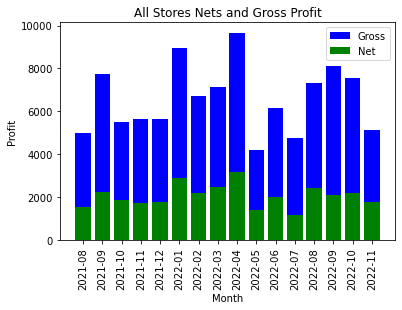

In [29]:
# x-coordinates of left sides of bars 
left = df99['Date']
  
# heights of bars
Gross = df99['Gross']
Net = df99['Net']
  
# labels for bars
tick_label = df99['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/all_stores_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()
